In [1]:
import urllib as urllib2
from bs4 import BeautifulSoup
import pandas as pd
import re
from unidecode import unidecode
import numpy as np

import ssl

ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [2]:
# Listing the link pages in a list 'links'. I could've gone through them with a for loop and the BeautifulSoup
# html parser, but in this case since it was only 4 links, I decided to list them and loop through this list.

links = ['https://www.metrolyrics.com/drake-albums-list.html',
        'https://www.metrolyrics.com/drake-albums-list-2.html',
        'https://www.metrolyrics.com/drake-albums-list-3.html',
        'https://www.metrolyrics.com/drake-albums-list-4.html']

In [3]:
# Creating a for loop to iterate through each link in the 'links' list, and extract the html contents with
# BeautifulSoup. I then find the contents for song links for each song in each album. I loop through the song
# links, and parse out the verses using BeautifulSoup. I then append each tracks lyrics to the empty list
# 'full_lyrics'. I also add each track name to the list 'track_name', and each album to the list 'album_names'

full_lyrics = []
track_names = []
album_names = []

for link in links:
    page = urllib2.urlopen(link, context=ctx)  
    soup = BeautifulSoup(page, 'html.parser')
    
    tracks = soup.find_all(attrs={'class': 'hasvid title'})
    tracks_2 = soup.find_all(attrs={'class': 'title'})
    
    for i in range(len(tracks)):
        page = urllib2.urlopen(tracks[i]['href'], context=ctx)  
        soup = BeautifulSoup(page, 'html.parser')
        verses = soup.find_all('p', attrs={'class': 'verse'})
        lyrics = ''
        track_name = tracks[i]['href'][28:-4].split('-lyrics')[0]
        album_name = tracks[i]['alt'].split('lyrics')[0]
    
        for verse in verses:
            text = verse.text.strip()
            text = re.sub(r"\[.*\]\n", "", unidecode(text))
            if lyrics == '':
                lyrics = lyrics + text.replace('\n', '|-|')
            else:
                lyrics = lyrics + '|-|' + text.replace('\n', '|-|')

            lyrics = lyrics.replace('\\', '')
            
            
        full_lyrics.append(lyrics)
        track_names.append(track_name)
        album_names.append(album_name)
            
    for i in range(len(tracks_2)):
        page = urllib2.urlopen(tracks_2[i]['href'], context=ctx)  
        soup = BeautifulSoup(page, 'html.parser')
        verses = soup.find_all('p', attrs={'class': 'verse'})
        lyrics = ''
        track_name = tracks_2[i]['href'][28:-4].split('-lyrics')[0]
        album_name = tracks_2[i]['alt'].split('lyrics')[0]
    
        for verse in verses:
            text = verse.text.strip()
            text = re.sub(r"\[.*\]\n", "", unidecode(text))
            if lyrics == '':
                lyrics = lyrics + text.replace('\n', '|-|')
            else:
                lyrics = lyrics + '|-|' + text.replace('\n', '|-|')

            lyrics = lyrics.replace('\\', '')
    
            
        full_lyrics.append(lyrics)
        track_names.append(track_name)
        album_names.append(album_name)

In [281]:
# I create a dataframe with all the data I scraped from the lyrics website

all_songs_df = pd.DataFrame(album_names, columns=['album'])
all_songs_df['song_name'] = track_names
all_songs_df['lyrics'] = full_lyrics
all_songs_df = all_songs_df[:-15]
all_songs_df.head()

,album,song_name,lyrics
0,Care Package Dreams Money Can Buy,dreams-money-can-buy,"Don't f-ck with me, don't f-ck with me|-|Don't..."
1,Care Package The Motion,the-motion,It's not me and you|-|Its not me it's you|-|yo...
2,Care Package How Bout Now,how-bout-now,"That's what I'm talking about though, like you..."
3,Care Package Trust Issues,trust-issues,"(Uh) Aww yeh, aww yeh|-|Call up I'm drinking....."
4,Care Package Days In The East,days-in-the-east,Yeah|-|Why you keep askin' me about her?|-|She...


In [282]:
# Listing the names of Drake's albums in a list 'drake_album_names'

drake_album_names = ["If You're Reading This It's Too Late", "More Life", 'What a Time to Be Alive',
                    'So Far Gone', 'The Best In The World Pack', 'Care Package', 'Thank Me Later', 'Take Care', 
                     'Nothing Was The Same', 'Views', 'Scorpion', 'More Than Enough',
                    'So Far Ahead', "You Welcome", 'Heartbreak Drake 2K11: The 2nd Semester', 'Lord Knows']

In [283]:
# Cleaning up the dataframe column 'album'. It contains album and track name. I want it to only contain the album
# name. To do this I am going to create a for loop that will loop through the list 'drake_album_names', and then
# loop through each row in the 'album' column of the all_song_df dataframe. If the row contains an album in the 
# drake_album_names list then it will replace the rows current value with the album name.

for album in drake_album_names:
    for row in all_songs_df['album']:
        if album in row:
            all_songs_df['album'].replace(row, album, inplace=True)

In [284]:
# Checking to see what the unique values are for the column 'album'

all_songs_df['album'].unique()

array(['Care Package', 'The Best In The World Pack', 'Scorpion',
       'More Life', u'Drake Deceiving ', u'Drake Shut It Down ',
       u'Drake Hush Up The Silence ', u'Drake Tuscan Leather ',
       u'Drake Killer ', u'Drake Paris Morton Music 2 ',
       u'Drake My New Shit ', u'Drake Man Of The Year ',
       u'Drake Lust For Life ', u"Drake I'm Upset ",
       u'Drake God (Snippet) ', u'Drake Versace (All Star Remix) ',
       u"Drake Marvin's Room / Buried Alive Interlude ",
       u"Drake Look What You've Done ", u'Drake Unstoppable (Remix) ',
       u'Drake Passionfruit [Explicit] ', u'Travis Scott SICKO MODE ',
       u'Rihanna Work ', u'Lil Baby Yes Indeed ', u'Lil Wayne Bedrock ',
       u"Rihanna What's My Name ", u'Nicki Minaj Only ',
       u'Alicia Keys Unthinkable ', u'Nicki Minaj Moment For Life ',
       u'Migos Walk It Talk It ', u"DJ Khaled I'm On One ",
       u'PARTYNEXTDOOR Come And See Me ', u'Nicki Minaj Moment 4 Life ',
       u'Nicki Minaj Truffle Butter ', u

In [285]:
# Getting rid of all songs that are not album songs

all_songs_df = all_songs_df[all_songs_df['album'].isin(drake_album_names)]

In [286]:
# Cleaning up the song_name column

all_songs_df['song_name'] = all_songs_df['song_name'].apply(lambda x: x.replace('-', ' ').title())

In [287]:
# Checking to see if there are dupliactes. Dropping any duplicates in the dataset.

print("Duplicates: {}".format(all_songs_df.duplicated().sum()))

all_songs_df.drop_duplicates(inplace=True)
print("Duplicates after drop_duplicates function: {}".format(all_songs_df.duplicated().sum()))

Duplicates: 232
Duplicates after drop_duplicates function: 0


In [288]:
# Checking to see if there are any song duplicates

all_songs_df[all_songs_df.duplicated(subset=['song_name'])]

,album,song_name,lyrics
198,If You're Reading This It's Too Late,My Side,"Yeah, that's about it|-|This shit sound like w..."
316,You Welcome,Club Paradise,They say that all your old girls got somebody ...
319,You Welcome,Free Spirit,Tat my name on you girls so I know it's real|-...
320,You Welcome,Trust Issues,"(Uh) Aww yeh, aww yeh|-|Call up I'm drinking....."
322,You Welcome,Dreams Money Can Buy,"Don't f-ck with me, don't f-ck with me|-|Don't..."
341,Lord Knows,Headlines,"I might be too strung out on compliments, over..."
343,Take Care,Over My Dead Body,"How I'm feeling, it doesn't matter|-|Cause you..."
344,Take Care,Shot For Me,"I can see it in your eyes, you're angry|-|Regr..."
345,Take Care,Headlines,"I might be too strung out on compliments, over..."
348,Take Care,Under Ground Kings,"Bridge over troubled water, ice in my muddy wa..."


In [289]:
all_songs_df.head(20)

,album,song_name,lyrics
0,Care Package,Dreams Money Can Buy,"Don't f-ck with me, don't f-ck with me|-|Don't..."
1,Care Package,The Motion,It's not me and you|-|Its not me it's you|-|yo...
2,Care Package,How Bout Now,"That's what I'm talking about though, like you..."
3,Care Package,Trust Issues,"(Uh) Aww yeh, aww yeh|-|Call up I'm drinking....."
4,Care Package,Days In The East,Yeah|-|Why you keep askin' me about her?|-|She...
5,Care Package,Draft Day,"Draft day, Johnny Manziel|-|Five years later h..."
6,Care Package,4Pm In Calabasas,Yeah|-|All you self promoters are janky|-|We e...
7,Care Package,5 Am In Toronto,Yeah|-|This song's from old Tommy Campos Dice ...
8,Care Package,I Get Lonely,"Waiting on you for so long, too many days sinc..."
9,Care Package,My Side,"Yeah, that's about it|-|This shit sound like w..."


In [290]:
# Checking to see how many songs have no lyrics listed in them

all_songs_df[all_songs_df['lyrics'] == '']

,album,song_name,lyrics
15,Care Package,Paris Morton Music,
190,If You're Reading This It's Too Late,Star67,
235,Views,Summers Over,
323,You Welcome,I Am Toronto,
363,Heartbreak Drake 2K11: The 2nd Semester,What Up,
383,You Welcome,Get My Paper Peril P,
385,You Welcome,Winters Gone Peril P,
391,You Welcome,Tony Montana Freestyle Peril P,
394,You Welcome,Love Remix,
466,Thank Me Later,Karaoke,


In [291]:
# Looking at the percentage of songs with no lyrics out of the entire dataframe

print(100.0 * len(all_songs_df[all_songs_df['lyrics'] == '']) / len(all_songs_df))

4.86891385768


In [292]:
# Removing the songs with no lyrics in them

all_songs_df = all_songs_df[all_songs_df['lyrics'] != ''].reset_index(drop=True)

In [293]:
# Checking to see if there are any null values

all_songs_df.isnull().sum()

album        0
song_name    0
lyrics       0
dtype: int64

In [399]:
# Building a function to add a column for release year 

def release_year_generator(row):
    if row == 'So Far Gone':
        return 2009
    elif row == 'So Far Ahead':
        return 2010
    elif row == 'More Than Enough':
        return 2010
    elif row == 'Thank Me Later':
        return 2010
    elif row == 'Heartbreak Drake 2K11: The 2nd Semester':
        return 2011
    elif row == 'Take Care':
        return 2011
    elif row == 'Lord Knows':
        return 2012
    elif row == 'You Welcome':
        return 2012
    elif row == 'Nothing Was The Same':
        return 2013
    elif row == 'If You\'re Reading This It\'s Too Late':
        return 2015
    elif row == "What a Time to Be Alive":
        return 2015
    elif row == 'Views':
        return 2016
    elif row == 'More Life':
        return 2017
    elif row == 'Scorpion':
        return 2018
    elif row == 'The Best In The World Pack':
        return 2019
    elif row == 'Care Package':
        return 2019

In [295]:
# Adding the release_year column with the new function

all_songs_df['release_year'] = all_songs_df['album'].apply(release_year_generator)

I am curious what the top 10 words are for each album, and interested to see how his word count changes over time. One thing to remember is that Care Package is his most recent release, but a lot of the songs on it are tracks that are 10 years old.

In [296]:
# Importing the count vectorizer

from sklearn.feature_extraction.text import CountVectorizer

In [297]:
# Creating a count vectorizer object

count_vect = CountVectorizer(stop_words='english', lowercase=True, strip_accents='unicode', max_features=10)

In [298]:
# Creating a function that create a count vector for each album and put the results into a DataFrame

def top_10_words(album):
    album_cv = count_vect.fit_transform(all_songs_df[all_songs_df['album'] == album]['lyrics'])
    
    feature_words = count_vect.get_feature_names()
    feature_words = np.asarray(feature_words)
    
    count_list = album_cv.toarray().sum(axis=0)
    
    word_counts_df = pd.DataFrame([feature_words, count_list], index=['Words', 'Count'])
    word_counts_df = word_counts_df.transpose()
    word_counts_df.sort_values('Count', ascending=False, inplace=True)
    word_counts_df['album'] = album
    
    return word_counts_df.head(10)

In [299]:
for album in all_songs_df['album'].unique():
    print(album)
    print(top_10_words(album))
    print('\n')

Care Package
  Words Count         album
4  know    94  Care Package
5  like    88  Care Package
3  just    84  Care Package
1   don    71  Care Package
8  shit    62  Care Package
6    oh    57  Care Package
2   got    54  Care Package
9  yeah    47  Care Package
0  baby    44  Care Package
7   say    43  Care Package


The Best In The World Pack
    Words Count                       album
1     got    13  The Best In The World Pack
7  niggas    13  The Best In The World Pack
8  really    13  The Best In The World Pack
3    like    11  The Best In The World Pack
6   nigga     9  The Best In The World Pack
5   money     8  The Best In The World Pack
2   gotta     7  The Best In The World Pack
0     die     6  The Best In The World Pack
9    yeah     6  The Best In The World Pack
4     lil     5  The Best In The World Pack


Scorpion
    Words Count     album
9    yeah    82  Scorpion
2     got    66  Scorpion
4    know    66  Scorpion
5    like    63  Scorpion
7      oh    56  Scorpion

In [300]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

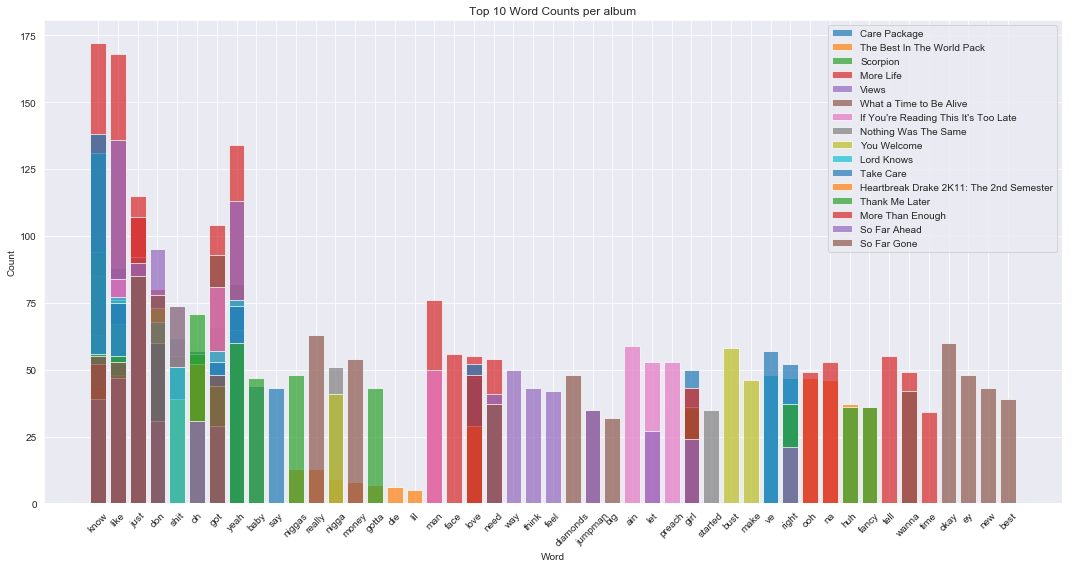

In [301]:
# Plotting all the top 10 words over all of Drake's albums on the same plot

plt.figure(figsize=(15, 8))
ax=plt.subplot()

for album in all_songs_df['album'].unique():
    g = top_10_words(album)
    plt.bar(g['Words'], g['Count'], label=album, alpha=0.7)
    plt.title('Top 10 Word Counts per album')
    plt.xticks(rotation=45)
    plt.xlabel('Word')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.legend()

In [302]:
# Creating a new dataframe with all the top 10 words and their counts for each album

word_count = pd.DataFrame(columns=['Words', 'Count', 'album'])

for album in all_songs_df['album'].unique():
    g = top_10_words(album)
    word_count = word_count.append(g, ignore_index=True)

In [303]:
# Checking the most frequent word for each album

word_count.groupby('album').first()

,Words,Count
album,,
Care Package,know,94
Heartbreak Drake 2K11: The 2nd Semester,just,84
If You're Reading This It's Too Late,know,85
Lord Knows,know,131
More Life,know,172
More Than Enough,just,107
Nothing Was The Same,just,92
Scorpion,yeah,82
So Far Ahead,just,90


In [304]:
pd.set_option('display.max_columns', 50)

In [305]:
word_count_per_album = word_count.groupby('Words')['album'].count().reset_index()
word_count_per_album.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
Words,ain,baby,best,big,bust,diamonds,die,don,ey,face,fancy,feel,girl,got,gotta,huh,jumpman,just,know,let,like,lil,love,make,man,money,na,need,new,nigga,niggas,oh,okay,ooh,preach,really,right,say,shit,started,tell,think,time,ve,wanna,way,yeah
album,1,2,1,1,1,1,1,10,1,1,2,1,5,15,2,2,2,14,14,2,16,1,5,1,2,2,2,3,1,3,2,5,1,2,1,2,4,1,6,1,1,1,1,2,2,1,12


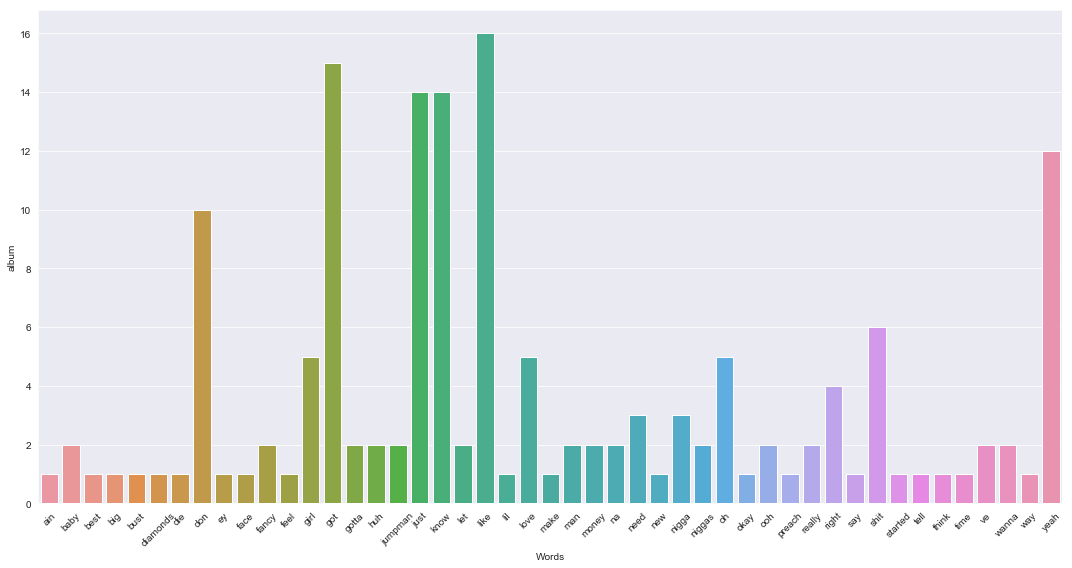

In [306]:
# Plotting the most common top 10 words across each album

plt.figure(figsize=(15, 8))
g = sns.barplot(x='Words', y='album', data=word_count_per_album)
g.set_xticklabels(word_count_per_album['Words'], rotation=45)
plt.tight_layout()
plt.show()

From the plot above I can tell that the word 'like' is one of the top 10 words for all of Drake's albums. The word 'got' is a top 10 word in 15 of 16 albums, and the words 'just' and 'know' are top 10 words in 14 of 16 albums.

## Topic Generator

In [332]:
all_songs_df = all_songs_df.drop_duplicates(subset='song_name').reset_index(drop=True)

In [334]:
# Importing TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

In [335]:
# Creating Tfidf object

tfidf = TfidfVectorizer(stop_words='english', lowercase=True, strip_accents='unicode')

In [336]:
word_frequency = tfidf.fit_transform(all_songs_df['lyrics'])

In [337]:
feature_names = tfidf.get_feature_names()

In [338]:
# Importing NMF

from sklearn.decomposition import NMF

In [339]:
nmf = NMF(n_components=8, random_state=1, alpha=0.1, l1_ratio=.5, init='nndsvd').fit(word_frequency)

In [340]:
# Creating a Function to display the topics for the inputs given. It will display the lyrics in each topic, and 
# the songs in each topic.

def display_topics(H, W, feature_names, documents, number_of_top_words, number_top_documents):
    for topic_idx, topic in enumerate(H):
        print "\n" + "Topic %d:" % (topic_idx)
        print "Topic Lyrics: " + " ".join([feature_names[i]
                        for i in topic.argsort()[:-number_of_top_words - 1:-1]])
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:number_top_documents]
        for doc_index in top_doc_indices:
            print "Topic Song: " + documents[doc_index]


In [341]:
# Creating H and W matrices to feed to the Function. H is the word to topics Matrix, and W is the documents to topics
# Matrix

H = nmf.components_
W = nmf.transform(word_frequency)

In [342]:
# Using the function to output the topics and each topics most common lyrics and most relevant songs.

display_topics(H, W, feature_names, all_songs_df['song_name'], 10, 7)


Topic 0:
Topic Lyrics: like just know yeah don got shit nigga right say
Topic Song: Club Paradise
Topic Song: Well Be Fine
Topic Song: Weall Be Fine
Topic Song: Over My Dead Body
Topic Song: How About Now
Topic Song: Marvins Room
Topic Song: Headlines

Topic 1:
Topic Lyrics: oh fancy huh good birthday hair ho yeah wit nails
Topic Song: Peak
Topic Song: Trust Issues
Topic Song: Show Me A Good Time
Topic Song: Fancy
Topic Song: A Night Off
Topic Song: Ratchet Happy Birthday
Topic Song: Fancy Remix

Topic 2:
Topic Lyrics: legend god die oh nigga backtrack youngest words mapped pull
Topic Song: Fall For Your Type
Topic Song: Legend
Topic Song: Madiba Riddim
Topic Song: Money In The Grave
Topic Song: The Motto
Topic Song: Under Ground Kings
Topic Song: Unstoppable

Topic 3:
Topic Lyrics: know girl heavy dun babe gotta wonder hot let ve
Topic Song: Since Way Back
Topic Song: Since Way Back Explicit
Topic Song: Headlines
Topic Song: Doing It Wrong
Topic Song: Jorja Interlude Explicit
Topic S

In [344]:
topics = ['Reminiscing On Old Love', 'Sex', 'Hustling / Getting Money', 'Getting Over Old Love / Moving On', 
         'Romance', 'Fakeness / Lonliness', 'Pimping', 'Gangsta / Boss Life / Flexing']

In [371]:
# Creating a DataFrame with the documents to topics Matrix as the values, the topic names as the columns, and the 
# song names as the index

topic_df = pd.DataFrame(W, columns=topics, index=all_songs_df['song_name'])

album = [album for album in all_songs_df['album']]
release_year = [year for year in all_songs_df['release_year']]

topic_df['album'] = album
topic_df.head()

,Reminiscing On Old Love,Sex,Hustling / Getting Money,Getting Over Old Love / Moving On,Romance,Fakeness / Lonliness,Pimping,Gangsta / Boss Life / Flexing,album
song_name,,,,,,,,,
Dreams Money Can Buy,0.094880,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Care Package
The Motion,0.061936,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Care Package
How Bout Now,0.212533,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Care Package
Trust Issues,0.123524,0.462886,0.0,0.000000,0.000000,0.0,0.0,0.0,Care Package
Days In The East,0.179614,0.063889,0.0,0.023614,0.016658,0.0,0.0,0.0,Care Package


In [372]:
# Grouping by album, and looking at the average for each topic per album

topic_df.groupby('album').mean().reset_index()

,album,Reminiscing On Old Love,Sex,Hustling / Getting Money,Getting Over Old Love / Moving On,Romance,Fakeness / Lonliness,Pimping,Gangsta / Boss Life / Flexing
0,Care Package,0.146171,0.041292,0.000000,0.008581,0.005876,0.004168,0.000000,0.011127
1,Heartbreak Drake 2K11: The 2nd Semester,0.088221,0.031978,0.093631,0.000721,0.000000,0.001060,0.040632,0.000000
2,If You're Reading This It's Too Late,0.123278,0.006463,0.060207,0.009184,0.004543,0.000000,0.000000,0.000000
3,Lord Knows,0.155475,0.023548,0.000990,0.007717,0.016581,0.002551,0.000000,0.000000
4,More Life,0.083047,0.001466,0.004547,0.059711,0.050480,0.056066,0.062658,0.063164
5,More Than Enough,0.099460,0.000000,0.000000,0.003103,0.000000,0.004370,0.006790,0.000000
6,Nothing Was The Same,0.149409,0.001309,0.000000,0.002810,0.006321,0.000000,0.000000,0.000000
7,Scorpion,0.086820,0.043256,0.000000,0.004624,0.000000,0.007294,0.003262,0.012970
8,So Far Ahead,0.084246,0.031615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,So Far Gone,0.097314,0.028883,0.000000,0.004853,0.022945,0.000000,0.022378,0.000000


In [373]:
# Creating a function to convert the values in topic_df to 0's or 1's in each topics column. I will use a threshold
# of 0.1, so if a value is > 0.1 than I will enter a 1 as the value. A 1 indicates that the song contains the 
# topic, while a 0 indicates that the song does not contain the topic

def topic_cleaner(row):
    if row > 0.1:
        return 1
    elif row <= 0.1:
        return 0

In [374]:
# Applying the topic to the DataFrame

for topic in topics:
    topic_df[topic] = topic_df[topic].apply(topic_cleaner)

In [375]:
# Grouping by album, and counting up the total topic counts for each topic per album

topic_sum_per_album = topic_df.groupby('album').sum().reset_index()
topic_sum_per_album

,album,Reminiscing On Old Love,Sex,Hustling / Getting Money,Getting Over Old Love / Moving On,Romance,Fakeness / Lonliness,Pimping,Gangsta / Boss Life / Flexing
0,Care Package,11,2,0,0,0,0,0,1
1,Heartbreak Drake 2K11: The 2nd Semester,4,1,1,0,0,0,1,0
2,If You're Reading This It's Too Late,13,0,1,0,0,0,0,0
3,Lord Knows,14,1,0,1,1,0,0,0
4,More Life,12,0,1,4,2,2,2,2
5,More Than Enough,4,0,0,0,0,0,0,0
6,Nothing Was The Same,11,0,0,0,0,0,0,0
7,Scorpion,8,2,0,0,0,0,0,1
8,So Far Ahead,2,1,0,0,0,0,0,0
9,So Far Gone,8,1,0,0,1,0,1,0


In [376]:
topic_sum_per_album = topic_sum_per_album.melt(id_vars='album')
topic_sum_per_album.rename(columns={'variable': 'topic',
                                   'value': 'number_of_songs'}, inplace=True)

In [380]:
topic_count = topic_sum_per_album.groupby('topic').number_of_songs.sum().reset_index()
topic_count

,topic,number_of_songs
0,Fakeness / Lonliness,2
1,Gangsta / Boss Life / Flexing,4
2,Getting Over Old Love / Moving On,6
3,Hustling / Getting Money,3
4,Pimping,4
5,Reminiscing On Old Love,124
6,Romance,6
7,Sex,9


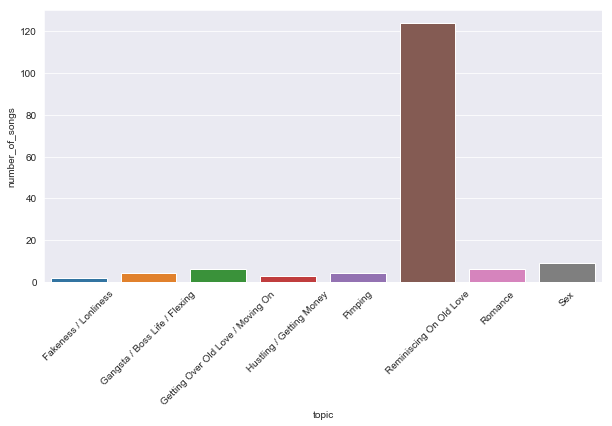

In [394]:
plt.figure(figsize=(10, 5))
g = sns.barplot(x='topic', y='number_of_songs', data=topic_count)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

In [400]:
topic_sum_per_album['release_year'] = topic_sum_per_album['album'].apply(release_year_generator)

topic_sum_per_album.sort_values('release_year', inplace=True)

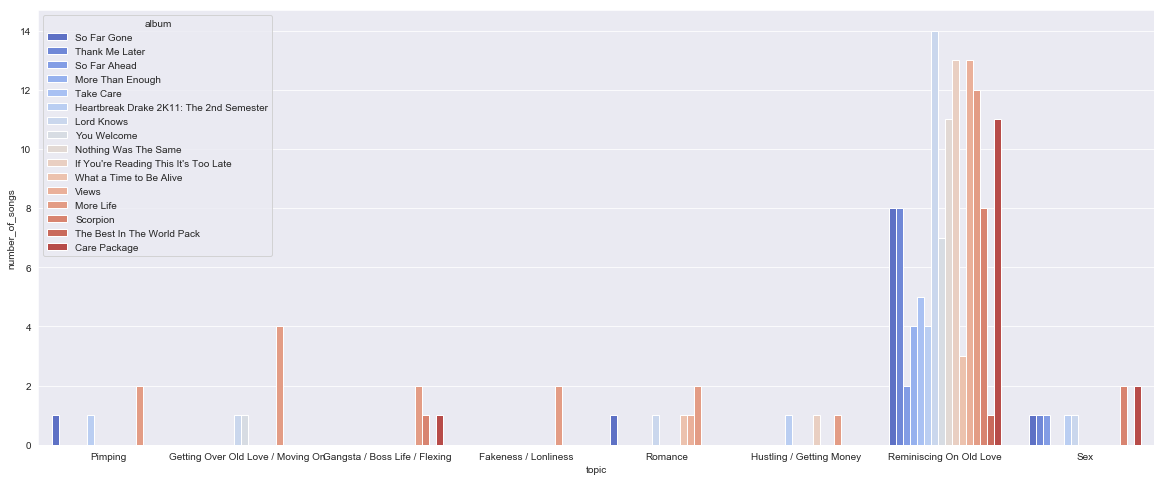

In [403]:
plt.figure(figsize=(20, 8))

sns.barplot(x='topic', y='number_of_songs', hue='album', data=topic_sum_per_album, palette='coolwarm')
plt.show()

In conclusion it looks like a large portion of Drake's album music falls under the topic of 'Reminiscing On Old Love'. There is a disparity though between the amount of tracks per album falling under this topic. His album 'Lord Knows' has the most songs Reminicising on old love, with 14 songs. The trend over albums show that he started off with 8 tracks on his first two albums under this topic, and then the amount of tracks falling under this topic per album dropped and stayed low until he released the album 'Lord Knows'. Most of his newer releases with exception to 'What a Time to Be Alive' and 'The Best in the World Pack' have a higher amount of tracks falling under the 'Reminiscing on Old Love' topic. This could be due to the fact that as Drake has grown into one of the most famous artists worldwide, and as he's gotten older he's been in more relationships, but still finds himself single when recording his albums.

Another thing I noticed is that a majority of his earlier albums have songs about Sex, and Courting girls, while his most recent albums have songs about Romance, and a different way of approaching love. His most recent albums also show more songs about 'Gangsta / Boss Life / Flexing', which is something I anticipated as increasing over time. That being said I expected a larger amount of songs to be in the 'Gangsta / Boss Life / Flexing' topic for his recent music. I concluded from this that a majority of Drake songs I know as 'Gangsta / Boss Life / Flexing' are either singles, or another artist's song which Drake is featured on. It was interesting to see that he tends not to put as many songs like this on his album. 

From looking at the data it looks like Drake's albums are his journals where he reminisces about his life and experiences - predominantly his experiences with love, and perhaps uses the albums as a way to tell his stories.